## Init

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [78]:
def griewank_f(X):
    return 1 + 1/4000 * np.sum(X**2) - np.prod(np.cos(X/np.sqrt(np.arange(len(X))+1)))
def michalewicz_f(X):
    return -np.sum(np.sin(X)*np.sin((np.arange(len(X))+1)*(X**2)/np.pi)**6)
def sum_squares(X):
    return np.sum(X**2)
def rastrigin_f(X):
    return 10*len(X) + np.sum(X**2 - len(X)*np.cos(2*np.pi*X))
def dixon_price_f(X):
    a = X[:-1]
    b = X[1:]
    return (X[0] - 1)**2 + np.sum((np.arange(len(b)) + 2)*((2*b**2-a)**2))
def gftmp(x,y,f):
    return f(np.array([x,y]))

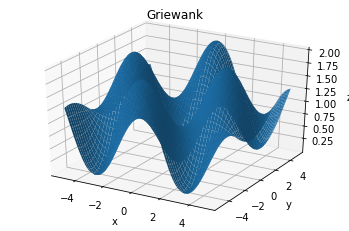

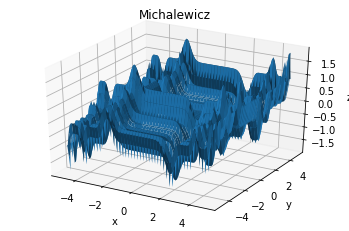

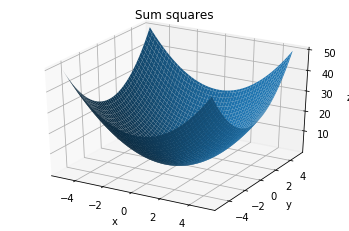

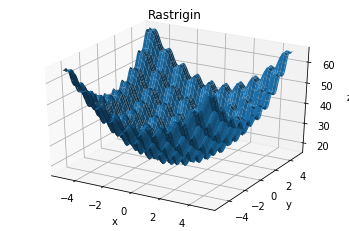

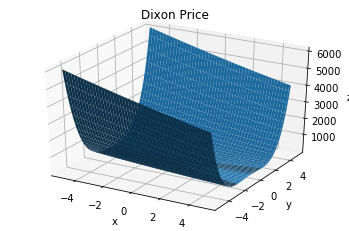

In [79]:
xline = np.linspace(-5, 5, 100)
yline = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xline,yline)
for (name,f) in [('Griewank',griewank_f), ('Michalewicz',michalewicz_f), ('Sum squares', sum_squares)
                ,('Rastrigin', rastrigin_f), ('Dixon Price',dixon_price_f)]:
    zs = np.array([gftmp(x,y,f) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z)
    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');




In [85]:
def random_population(mu, d, low, high):
    pop = [(low + (high-low)*np.random.rand(d),np.ones(d).astype(float)) for i in range(mu)]
    return np.array(pop)

def parents_selection(pop_v, lambd):
    prop = np.abs(pop_v) / np.sum(np.abs(pop_v)) # normalization
    parents_idx = np.zeros(lambd)
    for i in range(lambd):
        parents_idx[i] = np.random.choice(np.arange(len(prop)),p=prop) #roulette
    
    return parents_idx.astype(int)

def mutation(x, tau, tau0):
    x_v = x[0].copy()
    sigma_v =x[1].copy()
    eps0 = np.random.normal(0,tau0)
    eps_v = np.array([np.random.normal(0,tau) + eps0 for i in range(len(sigma_v))])
    sigma_v = np.exp(eps_v) * sigma_v
    x_v = np.array([x + np.random.normal(0,sigma) for (x,sigma) in zip(x_v, sigma_v)])

    return (x_v, sigma_v)

def best_idx(p_v, mu):
    return np.argpartition(p_v,mu)[:mu]

In [93]:
def run_instance(func,num_iterations=1000, d=30, K=0.2, mu=100, lambd=150, low=-20, high=20, plus=False):
    scores = np.zeros(num_of_iterations)
    p = random_population(mu, d, -20, 20)
    tau = K / np.sqrt(2*d)
    tau0 = K / np.sqrt(2*np.sqrt(d))
    for t in range(num_of_iterations):
        pop_v = np.array([func(x) for (x,sigma) in p])
        parents = p[parents_selection(pop_v, lambd)]
        children = np.array([mutation(parent, tau, tau0) for parent in parents])
        if plus:
            candidates =  np.concatenate((children, parents))
        else:
            candidates = children
        candidates_v = np.array([func(x) for (x,sigma) in candidates])
        p = candidates[best_idx(candidates_v, mu)]
        scores[t] = candidates_v.min()
    return scores

In [94]:
instances = [
    'Griewank Function',(griewank_f,1000,60,0.2,100,150,-600,600,True), (griewank_f,1000,120,0.25,120,170,-600,600,False),(griewank_f,1000,120,0.3,120,170,-600,600,True),
    'Michalewicz Function', (michalewicz_f,1000,60,0.2,100,150,0,4,True), (michalewicz_f,1000,120,0.25,120,170,0,4,False),(michalewicz_f,1000,120,0.3,120,170,0,4,True),
    'Sum squares Function', (sum_squares,1000,60,0.2,100,150,-10,10,True), (sum_squares,1000,120,0.25,120,170,-50,50,False),(sum_squares,1000,120,0.3,120,170,-500,500,True),
    'Rastrigin Function', (rastrigin_f,1000,60,0.2,100,150,-6,6,True), (rastrigin_f,1000,120,0.25,120,170,-6,6,False),(rastrigin_f,1000,120,0.3,120,170,-6,6,True),
    'Dixon Price Function', (dixon_price_f,1000,60,0.2,100,150,-10,10,True), (dixon_price_f,1000,120,0.25,120,170,-20,20,False),(dixon_price_f,1000,120,0.3,120,170,-100,100,True),
]

In [95]:
costs_inst = []

In [96]:
for i in instances:
    if type(i) != str:
        costs = run_instance(i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8])
        costs_inst.append((i,costs))
    else:
        costs_inst.append(i)

Griewank Function
(<function griewank_f at 0x7fc436054ee0>, 1000, 60, 0.2, 100, 150, -600, 600, True) 0.04022654602521081


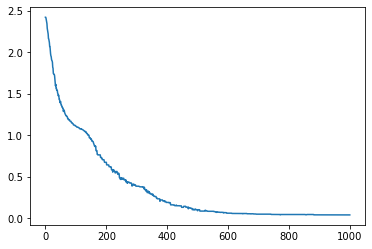

(<function griewank_f at 0x7fc436054ee0>, 1000, 120, 0.25, 120, 170, -600, 600, False) 1.1287663407826602


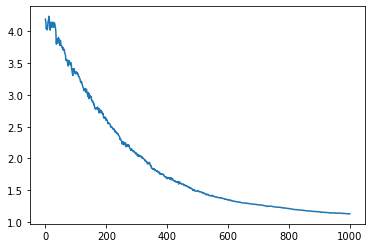

(<function griewank_f at 0x7fc436054ee0>, 1000, 120, 0.3, 120, 170, -600, 600, True) 0.04425352416381245


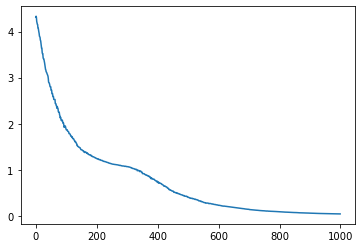

Michalewicz Function
(<function michalewicz_f at 0x7fc436054d30>, 1000, 60, 0.2, 100, 150, 0, 4, True) -18.12941680834147


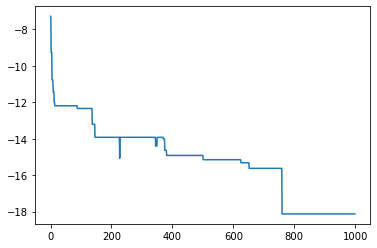

(<function michalewicz_f at 0x7fc436054d30>, 1000, 120, 0.25, 120, 170, 0, 4, False) -59.87736841900799


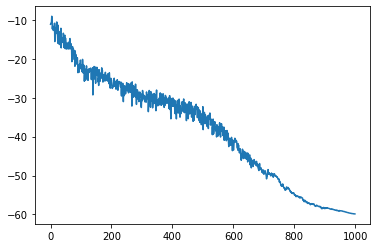

(<function michalewicz_f at 0x7fc436054d30>, 1000, 120, 0.3, 120, 170, 0, 4, True) -21.10152039797461


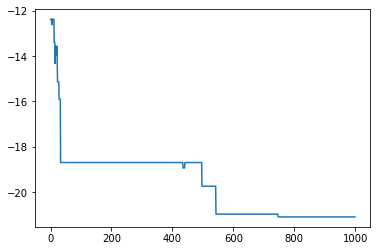

Sum squares Function
(<function sum_squares at 0x7fc436054280>, 1000, 60, 0.2, 100, 150, -10, 10, True) 0.790131893995067


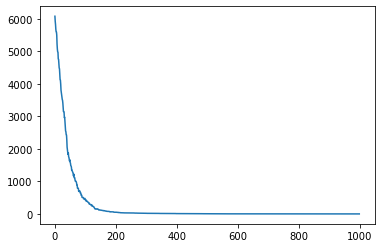

(<function sum_squares at 0x7fc436054280>, 1000, 120, 0.25, 120, 170, -50, 50, False) 480.38257123098924


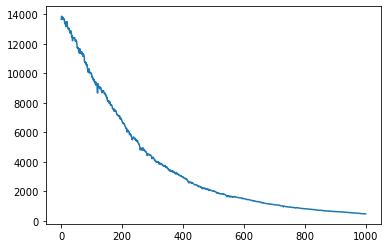

(<function sum_squares at 0x7fc436054280>, 1000, 120, 0.3, 120, 170, -500, 500, True) 0.3468526961235543


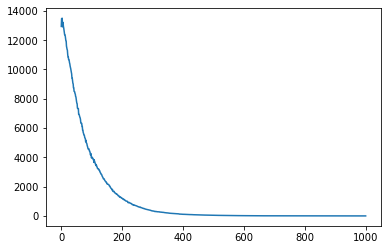

Rastrigin Function
(<function rastrigin_f at 0x7fc436054e50>, 1000, 60, 0.2, 100, 150, -6, 6, True) 1880.0079006863316


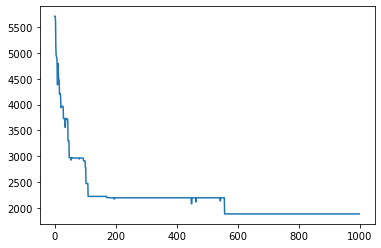

(<function rastrigin_f at 0x7fc436054e50>, 1000, 120, 0.25, 120, 170, -6, 6, False) -3747.3983824908482


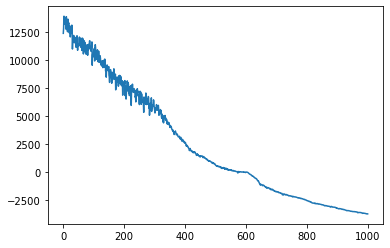

(<function rastrigin_f at 0x7fc436054e50>, 1000, 120, 0.3, 120, 170, -6, 6, True) 9829.910079031397


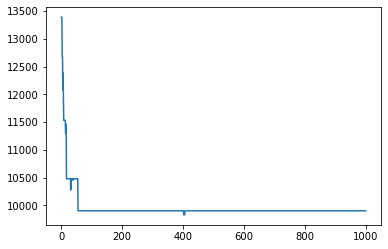

Dixon Price Function
(<function dixon_price_f at 0x7fc436054ca0>, 1000, 60, 0.2, 100, 150, -10, 10, True) 14.196095594530997


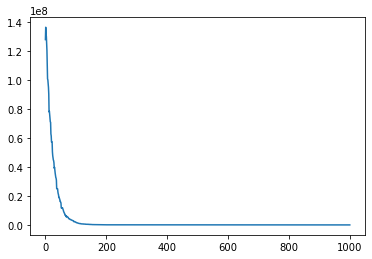

(<function dixon_price_f at 0x7fc436054ca0>, 1000, 120, 0.25, 120, 170, -20, 20, False) 6182033.143202791


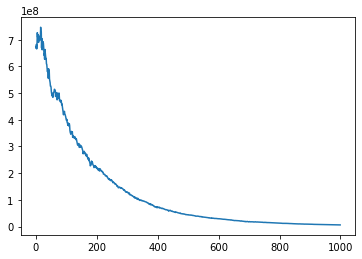

(<function dixon_price_f at 0x7fc436054ca0>, 1000, 120, 0.3, 120, 170, -100, 100, True) 372.65906549114493


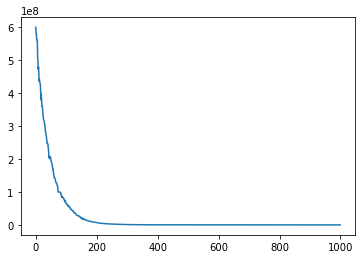

In [97]:
for c in costs_inst:
    if type(c) == str:
        print(c)
    else:
        print(c[0], c[1].min())
        plt.figure()
        plt.plot(c[1])
        plt.show()

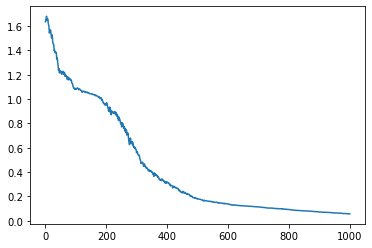

0.05662393930022047


In [98]:
plt.figure()
plt.plot(score)
plt.show()
print(score.min())

##### 